# Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

### Importing the Database

In [2]:
df1 = pd.read_csv("ml_datasource.csv")
df2 = df1.copy()
df1.head()

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0


### Removing Outliers

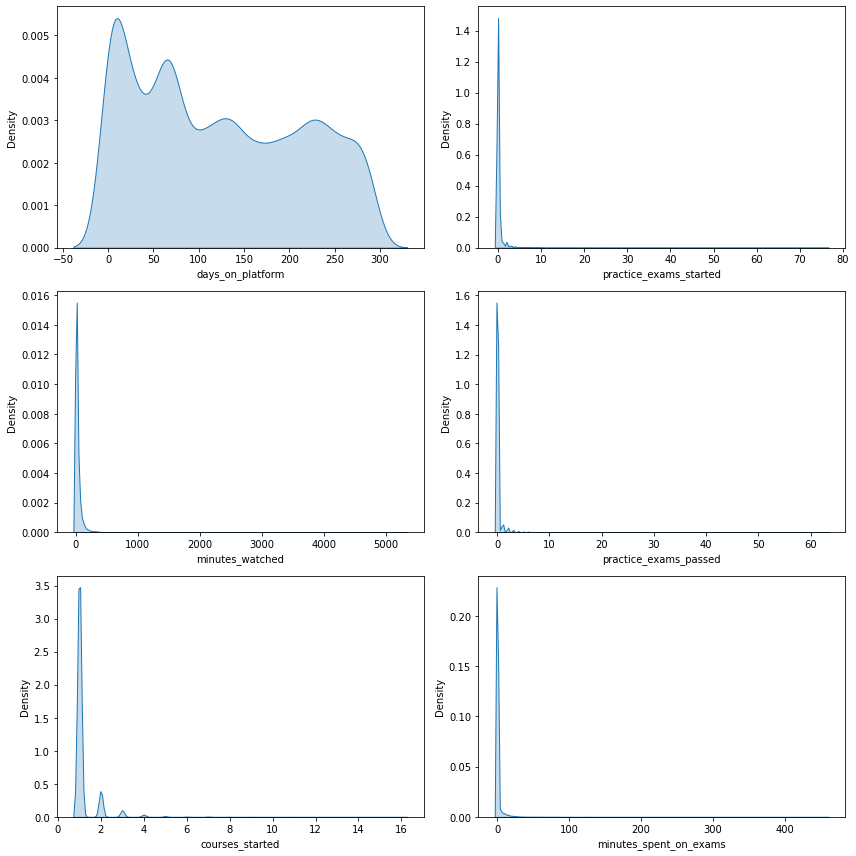

In [3]:
fig, axes = plt.subplots(3,2, figsize=(12,12))

x = df2.drop("purchased", axis=1)
Num_cols = x.select_dtypes(include=["float64","int64"]).columns

for i,j in enumerate(Num_cols):
    if i<3:
        sns.kdeplot(x[j], ax=axes[i, 0], fill=True)
    else:
        sns.kdeplot(x[j], ax=axes[i-3, 1], fill=True)
    
plt.tight_layout()
plt.show()

In [4]:
# Filter

# 1) Minutes_watched <= 1000
# 2) courses_started <= 10
# 3) practice_exams_started <= 10
# 4) minutes_spent_on_exams <= 40

print(df2.shape)
print("==================================================================================================================================================")

df3 = df2[(df2['minutes_watched'] <= 1000) & (df2['courses_started'] <= 10) & (df2['practice_exams_started'] <=10) & (df2['minutes_spent_on_exams']<=40) ]
df3

(17761, 8)


,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0
...,...,...,...,...,...,...,...,...
17756,EG,0,0.8,1,0,0,0.00,0
17757,IN,0,0.1,1,0,0,0.00,0
17758,CM,0,7.8,1,0,0,0.00,0
17759,CA,0,10.4,1,0,0,0.00,0


### Checking for Multicollinearity

In [5]:
# Multicollinearity factor (VIF) determines the correlation of columns with one another

from statsmodels.stats.outliers_influence import variance_inflation_factor

mul_data = df3.drop("student_country", axis=1)
cat_col = df3["student_country"]
removed_column = []

def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data['variable'] = data.columns
    vif_data['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    
    while vif_data['VIF'].max() > 5:
        remove_column = vif_data['variable'].loc[vif_data['VIF'].idxmax()]
        data = data.drop(remove_column, axis=1)
        vif_data = pd.DataFrame()
        vif_data['variable'] = data.columns
        vif_data['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
        removed_column.append(remove_column)
        
    return data

calculate_vif(mul_data)

,days_on_platform,minutes_watched,courses_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,288,358.1,1,2,15.81,0
1,260,1.7,1,0,16.00,0
2,260,22.4,1,0,0.93,0
3,259,18.8,1,1,14.63,0
4,259,118.0,2,1,16.48,0
...,...,...,...,...,...,...
17756,0,0.8,1,0,0.00,0
17757,0,0.1,1,0,0.00,0
17758,0,7.8,1,0,0.00,0
17759,0,10.4,1,0,0.00,0


In [6]:
x = calculate_vif(mul_data)

for i in range(x.shape[1]):
    print(variance_inflation_factor(x.values,i))

2.492125436190309
1.8137591531608466
3.4983037829786054
2.569372651916071
2.616566478485366
1.2284745734864655


In [7]:
df4 = pd.concat([cat_col, calculate_vif(mul_data)], axis=1)
df4.head(3)

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,15.81,0
1,SG,260,1.7,1,0,16.00,0
2,TR,260,22.4,1,0,0.93,0


### Dealing with NaN Values

In [8]:
df4.isnull().sum()

student_country           8
days_on_platform          0
minutes_watched           0
courses_started           0
practice_exams_passed     0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

In [9]:
df4[df4['student_country'].isna()]

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_passed,minutes_spent_on_exams,purchased
311,NaN,88,58.1,1,2,11.20,1
337,NaN,86,43.0,1,2,12.96,0
556,NaN,121,241.9,2,3,21.29,0
806,NaN,64,86.4,1,2,4.98,0
1097,NaN,72,67.5,1,1,6.27,0
12363,NaN,84,6.2,1,0,0.00,0
12633,NaN,78,3.0,1,0,0.00,0
16946,NaN,11,8.2,1,0,0.00,0


In [10]:
df4.fillna({"student_country":"NAM"}, inplace=True)
df4.isnull().sum()

student_country           0
days_on_platform          0
minutes_watched           0
courses_started           0
practice_exams_passed     0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

### Splitting the Data

In [11]:
x = df4.drop("purchased", axis=1)
y = df4["purchased"]

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=365)

In [12]:
xtest

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_passed,minutes_spent_on_exams
14179,IN,58,67.2,1,0,0.0
14921,US,14,36.9,1,0,0.0
6175,NL,209,0.8,1,0,0.0
15134,US,38,1.2,1,0,0.0
14708,BD,48,65.4,4,0,0.0
...,...,...,...,...,...,...
2666,DE,272,12.1,2,0,0.0
8417,SA,163,28.8,1,0,0.0
2486,PL,276,7.3,1,0,0.0
8034,US,171,1.2,1,0,0.0


### Encoding the Data

In [13]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=170)

xtrain['student_cont_enc'] = enc.fit_transform(xtrain['student_country'].to_numpy().reshape(-1,1))

xtest['student_cont_enc'] = enc.transform(xtest['student_country'].to_numpy().reshape(-1,1))

xtrain.drop("student_country", axis=1, inplace=True)
xtest.drop("student_country", axis=1, inplace=True)

In [14]:
xtrain.head(2)

,days_on_platform,minutes_watched,courses_started,practice_exams_passed,minutes_spent_on_exams,student_cont_enc
3861,249,24.6,1,0,0.0,44.0
14883,44,0.1,1,0,0.0,154.0


In [15]:
x_train_array = np.asarray(xtrain, dtype='float')
x_test_array = np.asarray(xtest, dtype='float')

print(x_train_array.shape)
print(x_test_array.shape)

(14100, 6)
(3526, 6)


In [16]:
y_train_array = np.asarray(ytrain, dtype='int')
y_test_array = np.asarray(ytest, dtype='int')

print(y_train_array.shape)
print(y_test_array.shape)

(14100,)
(3526,)


In [17]:
xtrain.isnull().sum()

days_on_platform          0
minutes_watched           0
courses_started           0
practice_exams_passed     0
minutes_spent_on_exams    0
student_cont_enc          0
dtype: int64

# Creating a Random Forests Model

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

best_rm = RandomForestClassifier(random_state=365, ccp_alpha=0.003)
best_rm.fit(x_train_array, y_train_array)

ypred = best_rm.predict(x_test_array)

cm = confusion_matrix(y_test_array, ypred)
print(cm,"\n")

print(classification_report(y_test_array, ypred), "\n")

print(accuracy_score(y_test_array, ypred))

[[3143   40]
 [ 111  232]] 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3183
           1       0.85      0.68      0.75       343

    accuracy                           0.96      3526
   macro avg       0.91      0.83      0.87      3526
weighted avg       0.95      0.96      0.95      3526
 

0.9571752694271128


# Build ML pipeline

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [24]:
pipelines = {
    "LR": make_pipeline(LogisticRegression(random_state=42)),
    "RF": make_pipeline(RandomForestClassifier(random_state=42)),
    "DT": make_pipeline(DecisionTreeClassifier(random_state=42))
}

In [25]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [26]:
hyper_grid = {
    "LR": {
        "logisticregression__C":[0.1,1,10],
        "logisticregression__class_weight":[None, 'balanced']
    },
    "RF": {
        "randomforestclassifier__ccp_alpha": [0.0, 0.001, 0.002, 0.003]
    },
    "DT": {
        "decisiontreeclassifier__ccp_alpha": [0.0, 0.001, 0.002, 0.003]
    }
}
    

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [28]:
fit_models = {}

for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyper_grid[algo], cv=5, n_jobs=-1)
    try:
        print("Started training for {}".format(algo))
        model.fit(x_train_array, y_train_array)
        best_para = model.best_params_
        fit_models[algo] = model
        print(" {} has been successfully fit".format(algo))
        print(" Best params of", algo, ":", best_para)
    except NotFittedError as e:
        print(repr(e))
        

Started training for LR
 LR has been successfully fit
 Best params of LR : {'logisticregression__C': 0.1, 'logisticregression__class_weight': None}
Started training for RF
 RF has been successfully fit
 Best params of RF : {'randomforestclassifier__ccp_alpha': 0.001}
Started training for DT
 DT has been successfully fit
 Best params of DT : {'decisiontreeclassifier__ccp_alpha': 0.003}


In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [30]:
for algo, model in fit_models.items():
    yhat = model.predict(x_test_array)
    print("{} accuracy score: {}". format(algo, accuracy_score(y_test_array, yhat)))

LR accuracy score: 0.943562110039705
RF accuracy score: 0.9574588769143505
DT accuracy score: 0.9577424844015882


In [31]:
best_model = fit_models['DT']